# Universidad Politécnica Salesiana
## Entrenamiento de una red neuronal: clasificación básica
## Clasificación de objetos
### Por Alexander Siavichay

Disponible: https://github.com/siavichay/ClasificadorDeObjetos/blob/master/ClasificadorDeObjetos.ipynb

En este libro de Python se presenta una clasificación de 10 dígitos escritos a mano utilizando un perceptrón y luego se utilizara el mismo modelo de red neuronal para determinar 10 clases de objetos y comparar los resultados.


El entrenamiento de la red se lleva a cabo utilizando una API de alto-nivel llamada *tf.keras* que está diseñada para entrenar modelos en TensorFlow.

Prerequisitos

- numpy
- matplotlib
- pickle
- keras.utils
- tensorflow

## Clasificador de digitos (0-9)

### Data
    https://www.kaggle.com/c/Kannada-MNIST/data

In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
data_path = "Kannada-MNIST/"
train_data = np.loadtxt(data_path + "train.csv", delimiter=",",skiprows=1)
test_data = np.loadtxt(data_path + "Dig-MNIST.csv", delimiter=",",skiprows=1) 
test_data[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [7., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]])

In [5]:
test_data[test_data==255]
test_data.shape

(5000, 785)

In [42]:
fac = 0.99 / 255
train_imgs = np.asfarray(train_data[:, 1:]) * fac + 0.01
test_imgs = np.asfarray(test_data[:, 1:]) * fac + 0.01

train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])

In [7]:
lr = np.arange(10)

for label in range(10):
    one_hot = (lr==label).astype(np.int)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  1  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  3  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  5  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  6  in one-hot representation:  [0 0 0 0 0 0 1 0 0 0]
label:  7  in one-hot representation:  [0 0 0 0 0 0 0 1 0 0]
label:  8  in one-hot representation:  [0 0 0 0 0 0 0 0 1 0]
label:  9  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]


In [8]:
lr = np.arange(no_of_different_labels)

# transform labels into one hot representation
train_labels_one_hot = (lr==train_labels).astype(np.float)
test_labels_one_hot = (lr==test_labels).astype(np.float)

# we don't want zeroes and ones in the labels neither:
train_labels_one_hot[train_labels_one_hot==0] = 0.01
train_labels_one_hot[train_labels_one_hot==1] = 0.99
test_labels_one_hot[test_labels_one_hot==0] = 0.01
test_labels_one_hot[test_labels_one_hot==1] = 0.99

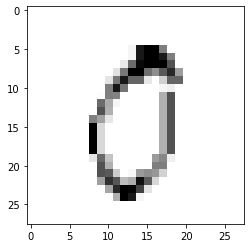

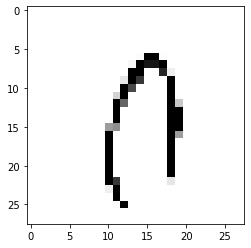

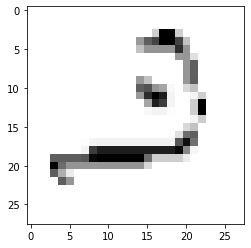

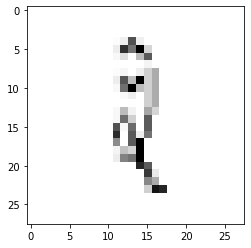

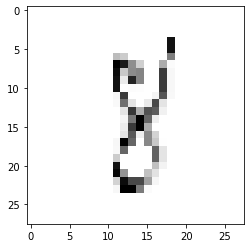

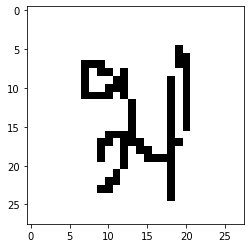

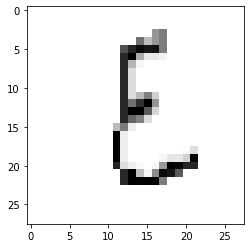

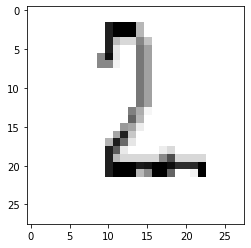

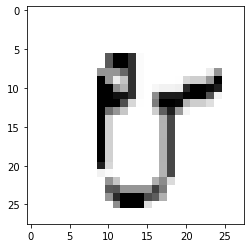

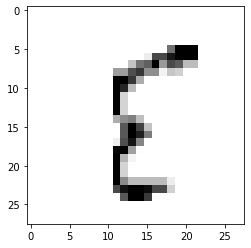

In [17]:
for i in range(10):
    img = train_imgs[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

In [11]:
import pickle

with open("Kannada-MNIST/pickled_mnist.pkl", "bw") as fh:
    data = (train_imgs, 
            test_imgs, 
            train_labels,
            test_labels,
            train_labels_one_hot,
            test_labels_one_hot)
    pickle.dump(data, fh)

### Modelo de Red

In [13]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [23]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [28]:
train_imgsRS=train_imgs.reshape(60000,28,28)
print(train_imgsRS.shape)
print(test_imgs.shape)

(60000, 28, 28)
(5000, 784)


### Entrenamiento

In [25]:
model.fit(train_imgsRS, train_labels, epochs=10, batch_size=32, verbose=2, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.0123 - acc: 0.9964 - val_loss: 0.0566 - val_acc: 0.9838
Epoch 2/10
 - 3s - loss: 0.0083 - acc: 0.9978 - val_loss: 0.0751 - val_acc: 0.9808
Epoch 3/10
 - 3s - loss: 0.0072 - acc: 0.9980 - val_loss: 0.0647 - val_acc: 0.9832
Epoch 4/10
 - 3s - loss: 0.0048 - acc: 0.9988 - val_loss: 0.0719 - val_acc: 0.9824
Epoch 5/10
 - 3s - loss: 0.0039 - acc: 0.9991 - val_loss: 0.0580 - val_acc: 0.9862
Epoch 6/10
 - 3s - loss: 0.0036 - acc: 0.9989 - val_loss: 0.0644 - val_acc: 0.9848
Epoch 7/10
 - 3s - loss: 0.0039 - acc: 0.9989 - val_loss: 0.0663 - val_acc: 0.9854
Epoch 8/10
 - 3s - loss: 0.0023 - acc: 0.9995 - val_loss: 0.0671 - val_acc: 0.9847
Epoch 9/10
 - 3s - loss: 0.0016 - acc: 0.9995 - val_loss: 0.0677 - val_acc: 0.9852
Epoch 10/10
 - 3s - loss: 0.0034 - acc: 0.9990 - val_loss: 0.0669 - val_acc: 0.9848


In [47]:
print(test_imgs.shape)

(10240, 784)


In [48]:
#train_imgsRS=train_imgs.reshape(60000,28,28)
test_loss, test_acc = model.evaluate(test_imgs.reshape(10240, 28,28), test_labels)

10240/10240 [==============================] - 0s 34us/sample - loss: 3.5694 - acc: 0.6561


In [50]:
for x in range(0,10):
    predicciones=model.predict(test_imgs.reshape(10240, 28,28))
    predicciones[x]
    #print(predicciones[x])
    a=np.argmax(predicciones[x])
    print(a)
    print(test_labels[x])
    print("--")

0
[0.]
--
1
[1.]
--
2
[2.]
--
3
[3.]
--
4
[4.]
--
5
[5.]
--
6
[6.]
--
7
[7.]
--
8
[8.]
--
9
[9.]
--


## Clasificador de Objetos

### Dataset
https://www.cs.toronto.edu/~kriz/cifar.html

In [76]:
from IPython.display import Image
from IPython.display import display

# inline plotting instead of popping out
%matplotlib inline

# load utility classes/functions that has been taught in previous labs
# e.g., plot_decision_regions()
import os, sys
module_path = os.path.abspath(os.path.join('.'))
sys.path.append(module_path)
from lib import *

In [77]:
# dataset path
home = os.path.expanduser('~')
data_path = os.path.join(home, "Documents\Maestria\IIICICLO\ProcesamientoDigitalDeSenales\ReconocimientoDePatrones\ClasificadorDeObjetos")


# CIFAR-10 constants
img_size = 32
img_channels = 3
nb_classes = 10
# length of the image after we flatten the image into a 1-D array
img_size_flat = img_size * img_size * img_channels
nb_files_train = 5
images_per_file = 10000
# number of all the images in the training dataset
nb_images_train = nb_files_train * images_per_file

In [78]:
import _pickle as pickle
from keras.utils import np_utils
import numpy as np

def load_data(file_name):
    file_path = os.path.join(data_path, "cifar-10-batches-py/", file_name)
    
    print('Loading ' + file_name)
    with open(file_path, mode='rb') as file:    
        data = pickle.load(file, encoding='bytes')
    raw_images = data[b'data']
    cls = np.array(data[b'labels'])
    
    images = raw_images.reshape([-1, img_channels, img_size, img_size])    
    # move the channel dimension to the last
    images = np.rollaxis(images, 1, 4)
    
    return images, cls

def load_training_data():    
    # pre-allocate the arrays for the images and class-numbers for efficiency.
    images = np.zeros(shape=[nb_images_train, img_size, img_size, img_channels], 
                      dtype=int)
    cls = np.zeros(shape=[nb_images_train], dtype=int)
    
    begin = 0
    for i in range(nb_files_train):
        images_batch, cls_batch = load_data(file_name="data_batch_" + str(i + 1))
        num_images = len(images_batch)
        end = begin + num_images
        images[begin:end, :] = images_batch
        cls[begin:end] = cls_batch
        begin = end
        
    return images, np_utils.to_categorical(cls, nb_classes)

def load_test_data():
    images, cls = load_data(file_name="test_batch")
    
    return images, np_utils.to_categorical(cls, nb_classes)

def load_cifar():
    X_train, Y_train = load_training_data()
    X_test, Y_test = load_test_data()
    
    return X_train, Y_train, X_test, Y_test

In [79]:


X_train, Y_train, X_test, Y_test = load_cifar()

print('\nX_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)



Loading data_batch_1
Loading data_batch_2
Loading data_batch_3
Loading data_batch_4
Loading data_batch_5
Loading test_batch

X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 10)


In [80]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

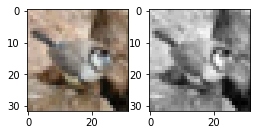

In [116]:
import matplotlib.pyplot as plt

def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # add channel dimension
    rst = np.expand_dims(rst, axis=3)
    return rst

X_train_gray = grayscale(X_train)
X_test_gray = grayscale(X_test)

# now we have only one channel in the images
img_channels = 1

# plot a randomly chosen image
img = 90
plt.figure(figsize=(4, 2))
plt.subplot(1, 2, 1)
plt.imshow(X_train[img], interpolation='none')
plt.subplot(1, 2, 2)
plt.imshow(X_train_gray[img, :, :, 0], cmap=plt.get_cmap('gray'), interpolation='none')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X_train_gray, X_val_gray, Y_train, Y_val = train_test_split(X_train_gray, Y_train, test_size=0.2, random_state=0)

print('X_train_gray shape:', X_train_gray.shape)
print('X_val_gray shape:', X_val_gray.shape)

X_train_gray shape: (40000, 32, 32, 1)
X_val_gray shape: (10000, 32, 32, 1)


###  Modelo
Se utilizara el mismo modelo anterior, pero la matriz de labels es diferente, por lo que se utilizará 'categorical_crossentropy'

In [113]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [44]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:

X_train_gray.shape=(40000, 32, 32)
X_val_gray.shape=(10000, 32, 32)

In [28]:
print(X_train_gray.shape)
print(X_val_gray.shape)

#Y_train = to_categorical(Y_train, num_classes=10)
print(Y_train.shape)

(40000, 32, 32)
(10000, 32, 32)
(40000, 10)


### Entrenamiento

In [45]:
model.fit(X_train_gray, Y_train, epochs=100, batch_size=32, verbose=2, validation_split=0.2)

Train on 32000 samples, validate on 8000 samples
Epoch 1/100
 - 3s - loss: 2.1018 - acc: 0.2352 - val_loss: 2.0281 - val_acc: 0.2724
Epoch 2/100
 - 2s - loss: 1.9910 - acc: 0.2855 - val_loss: 1.9810 - val_acc: 0.2911
Epoch 3/100
 - 2s - loss: 1.9275 - acc: 0.3123 - val_loss: 1.9030 - val_acc: 0.3270
Epoch 4/100
 - 2s - loss: 1.8863 - acc: 0.3282 - val_loss: 1.8841 - val_acc: 0.3241
Epoch 5/100
 - 3s - loss: 1.8536 - acc: 0.3427 - val_loss: 1.8669 - val_acc: 0.3405
Epoch 6/100
 - 2s - loss: 1.8286 - acc: 0.3543 - val_loss: 1.8695 - val_acc: 0.3309
Epoch 7/100
 - 2s - loss: 1.8137 - acc: 0.3566 - val_loss: 1.8387 - val_acc: 0.3420
Epoch 8/100
 - 2s - loss: 1.7986 - acc: 0.3618 - val_loss: 1.8230 - val_acc: 0.3524
Epoch 9/100
 - 2s - loss: 1.7839 - acc: 0.3690 - val_loss: 1.8082 - val_acc: 0.3517
Epoch 10/100
 - 2s - loss: 1.7693 - acc: 0.3728 - val_loss: 1.8173 - val_acc: 0.3539
Epoch 11/100
 - 2s - loss: 1.7646 - acc: 0.3733 - val_loss: 1.8100 - val_acc: 0.3520
Epoch 12/100
 - 2s - loss

Epoch 97/100
 - 2s - loss: 1.5196 - acc: 0.4571 - val_loss: 1.8160 - val_acc: 0.3819
Epoch 98/100
 - 2s - loss: 1.5221 - acc: 0.4574 - val_loss: 1.8172 - val_acc: 0.3769
Epoch 99/100
 - 3s - loss: 1.5185 - acc: 0.4608 - val_loss: 1.8309 - val_acc: 0.3761
Epoch 100/100
 - 2s - loss: 1.5192 - acc: 0.4583 - val_loss: 1.8366 - val_acc: 0.3766


In [46]:
score = model.evaluate(X_val_gray, Y_test, batch_size=128, verbose=0)
#test_loss, test_acc = model.evaluate(X_val_gray, Y_test)



print(model.metrics_names)
print(score)


#print('Precisión Test', test_acc)

['loss', 'acc']
[3.7451574867248536, 0.1002]


In [115]:

def testVector(testVector):
    for x in range(10):
        if testVector[x]==1:
            return x

for x in range(17,20):
    predicciones=model.predict(X_val_gray)
    predicciones[x]
    #print(predicciones[x])
    a=np.argmax(predicciones[x])
    print(a)
    print(testVector(Y_test[x]))
    print("--")

6
7
--
6
8
--
6
6
--


### Conclusiones
Como se puede observar en las pruebas anteriores, a pesar de haber utilizado los mismos parámetros en la red para clasificar imágenes, para el primer caso, la red funciona perfectamente prediciendo digitos, sin embargo, para la prediccion de objetos en los cuales tenemos ruido, background, entre otros, la red no da buenos resultados. Para este último caso deberíamos utilizar redes convolucionales para mejorar la predicción.

## Referencias
Tratamiento de imágenes usando ImageDataGenerator en Keras https://enmilocalfunciona.io/tratamiento-de-imagenes-usando-imagedatagenerator-en-keras/
Python Machine Learning Tutorial https://www.python-course.eu/neural_network_mnist.php
Guide to build an image classifier using CNN with CIFAR-10 dataset https://medium.com/@udolf15/building-a-image-classifier-using-cnn-with-cifar-10-dataset-5682afa4f51
